<a href="https://colab.research.google.com/github/jemiridaniel/TS_Academy_Capstone_Project/blob/main/Telco_Customer_Churn_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TS Academy Capstone Project  | Group 9
## Track: Classification  
## Dataset: Telco Customer Churn (IBM)

---

## Group Members

| Name | Email | GitHub Repository |
|------|-------|------------------|
| Jemiri Daniel | updatedan2@gmail.com | https://github.com/jemiridaniel/TS_Academy_Capstone_Project |
| Member 2 | member2@email.com | https://github.com/member2/TS_Academy_Capstone_Project |
| Member 3 | member3@email.com | https://github.com/member3/TS_Academy_Capstone_Project |

---

## 📊 Project Overview

### Chosen Track
**Classification Track**

### Problem Statement
Predict whether a telecom customer will churn (Yes/No) using supervised learning techniques.

### Dataset
**Telco Customer Churn Dataset (IBM)**  
Contains 7,043 customers with demographic, service, billing, and contract features.

Target variable: **Churn (Yes/No)**

---

## 🔗 GitHub Repositories

Each group member has created a repository named:

**TS_Academy_Capstone_Project**

Repository links:

- Member 1: https://github.com/jemiridaniel/TS_Academy_Capstone_Project
- Member 2: https://github.com/member2/TS_Academy_Capstone_Project
- Member 3: https://github.com/member3/TS_Academy_Capstone_Project

---

This notebook covers **all mandatory preprocessing + EDA** items and the **classification track** modeling requirements:

- Data preprocessing (cleaning, type fixes, missing values handling)
- **Full EDA**: dataset overview, missingness visuals, numeric & categorical profiling, univariate + bivariate/multivariate analysis
- Baseline model: **Logistic Regression**
- Advanced model: **Random Forest**
- Metrics: Accuracy, Precision, Recall, F1, Confusion Matrix
- **Class imbalance strategies** and comparison
- Feature interpretation (coefficients + feature importance)
- Error analysis: false positives vs false negatives + confusion matrix interpretation

In [1]:
# Imports
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

from google.colab import drive

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [2]:
# 1) Load data
DATA_PATH = '/content/drive/MyDrive/TS Academy/WA_Fn-UseC_-Telco-Customer-Churn.csv'

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(
        f'Could not find file at: {DATA_PATH}\n'
        'Please confirm the path or update DATA_PATH.'
    )

df_raw = pd.read_csv(DATA_PATH)
print('Raw shape:', df_raw.shape)
display(df_raw.head())


Raw shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2) Dataset Overview
Rows, columns, dtypes, memory usage, and basic descriptive statistics.

In [3]:
# Dataset overview
df_raw.info(memory_usage='deep')

print('\nRows:', df_raw.shape[0])
print('Columns:', df_raw.shape[1])

# Basic stats (numeric)
display(df_raw.describe(include=[np.number]).T)

# Basic stats (categorical)
display(df_raw.describe(include=['object']).T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## 3) Data Preprocessing
Cleaning + validation:
- Standardize column names
- Strip whitespace in string fields
- Fix `TotalCharges` numeric parsing (blanks → NaN)
- Ensure numeric fields are numeric
- Validate target `Churn` and build binary label
- Remove duplicate `customerID`


In [4]:
# Work on a copy
df = df_raw.copy()

# Standardize column names
df.columns = [c.strip() for c in df.columns]

# Strip whitespace for object columns
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

# customerID uniqueness
if 'customerID' in df.columns:
    before = df.shape[0]
    df = df.drop_duplicates(subset=['customerID'])
    after = df.shape[0]
    if after != before:
        print(f'Dropped {before-after} duplicate customerID rows')

# Convert TotalCharges to numeric (often stored as text)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].replace({'': np.nan, ' ': np.nan})
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Ensure numeric types
for col in ['tenure', 'MonthlyCharges']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# SeniorCitizen should be 0/1
if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').fillna(0).astype(int)
    bad_sc = set(df['SeniorCitizen'].unique()) - {0, 1}
    if bad_sc:
        print('Warning: unexpected SeniorCitizen values:', bad_sc)

# Validate target
if 'Churn' not in df.columns:
    raise ValueError("Target column 'Churn' not found. Confirm this is the Telco churn dataset.")
bad_churn = set(df['Churn'].unique()) - {'Yes', 'No'}
if bad_churn:
    print('Warning: unexpected Churn values:', bad_churn)

print('Cleaned shape:', df.shape)
display(df.head())


Cleaned shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4) Missing Values Analysis
We visualize missingness with:
- Bar chart (% missing per column)
- Heatmap-style matrix (rows x columns) showing missing patterns


,missing_rate
TotalCharges,0.001562


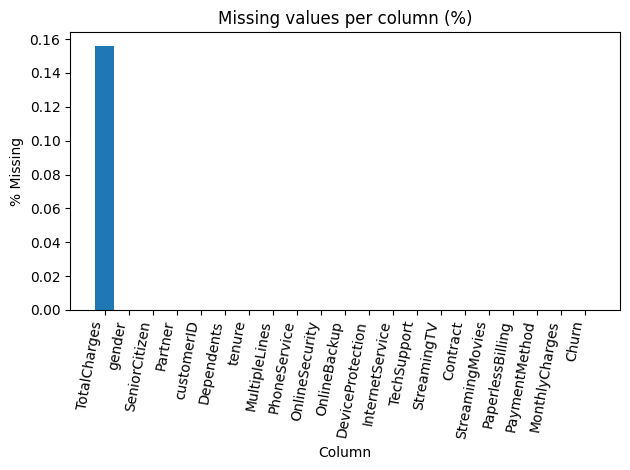

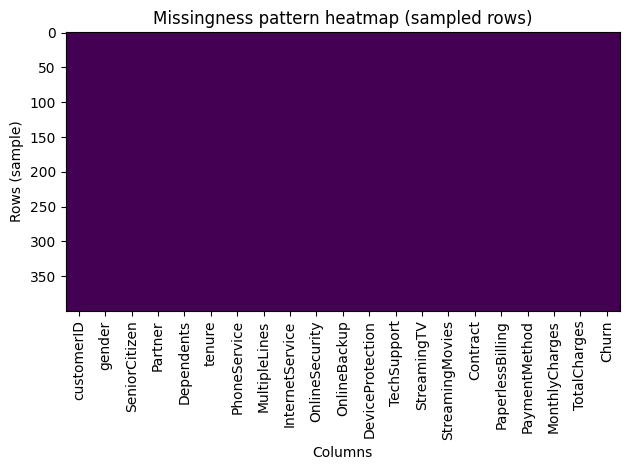

In [5]:
missing_rate = df.isna().mean().sort_values(ascending=False)
display(missing_rate[missing_rate > 0].to_frame('missing_rate'))

# Bar chart of missingness
plt.figure()
plt.bar(missing_rate.index.astype(str), (missing_rate.values * 100))
plt.title('Missing values per column (%)')
plt.xlabel('Column')
plt.ylabel('% Missing')
plt.xticks(rotation=80, ha='right')
plt.tight_layout()
plt.show()

# Missingness heatmap (boolean matrix)
# NOTE: For large datasets, we sample rows to keep it readable
sample_df = df.sample(n=min(400, len(df)), random_state=RANDOM_STATE)
miss_matrix = sample_df.isna().astype(int).values  # 1 = missing

plt.figure()
plt.imshow(miss_matrix, aspect='auto')
plt.title('Missingness pattern heatmap (sampled rows)')
plt.xlabel('Columns')
plt.ylabel('Rows (sample)')
plt.xticks(ticks=np.arange(len(sample_df.columns)), labels=sample_df.columns, rotation=90)
plt.tight_layout()
plt.show()


## 5) Target Variable Analysis (For Supervised Classification)
We check class distribution and imbalance.

,count,percent
Churn,,
No,5174,73.46
Yes,1869,26.54


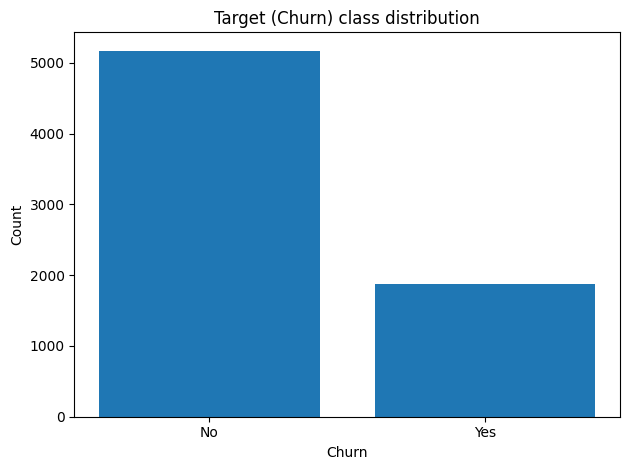

In [6]:
target_counts = df['Churn'].value_counts()
target_pct = df['Churn'].value_counts(normalize=True) * 100
display(pd.DataFrame({'count': target_counts, 'percent': target_pct.round(2)}))

plt.figure()
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.title('Target (Churn) class distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## 6) Numeric Feature Profiling
For **each numeric feature** we generate:
- Histogram
- Skewness & kurtosis
- Box plot (outliers)
- Descriptive stats (mean/median/std/min/max)


Numeric columns for profiling: ['tenure', 'MonthlyCharges', 'TotalCharges']

--- tenure stats ---
count: 7043
mean: 32.37114865824223
median: 29.0
std: 24.55948102309423
min: 0.0
max: 72.0
skewness: 0.2395397495619829
kurtosis: -1.387371635971685


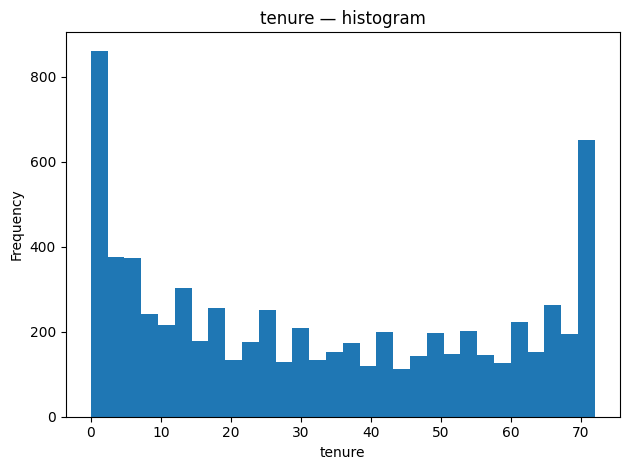

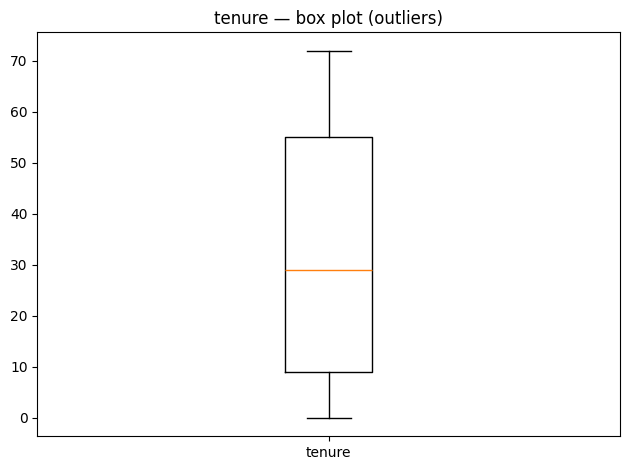


--- MonthlyCharges stats ---
count: 7043
mean: 64.76169246059918
median: 70.35
std: 30.09004709767854
min: 18.25
max: 118.75
skewness: -0.22052443394398033
kurtosis: -1.2572596945495056


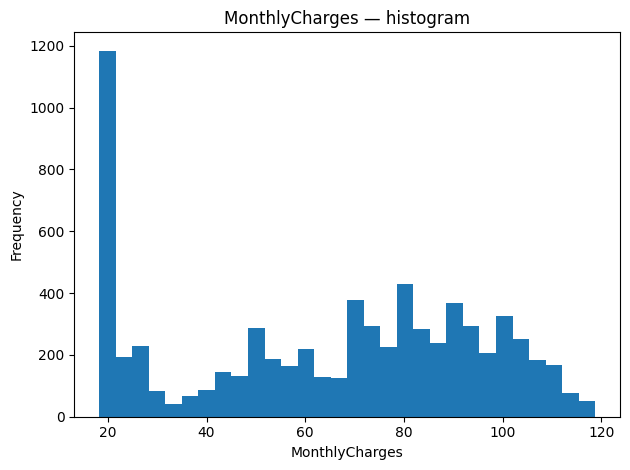

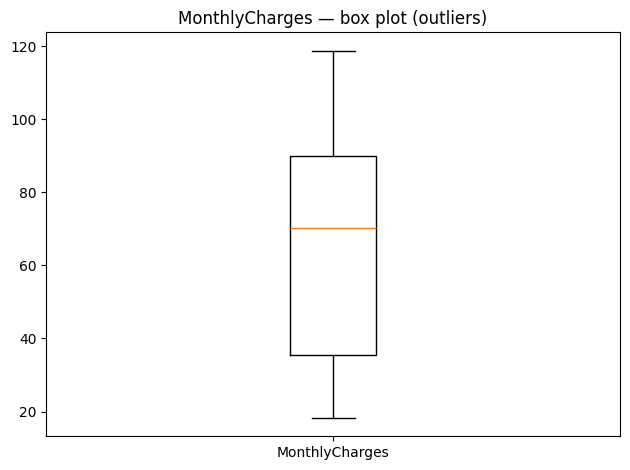


--- TotalCharges stats ---
count: 7032
mean: 2283.300440841866
median: 1397.475
std: 2266.7713618831453
min: 18.8
max: 8684.8
skewness: 0.9616424997242504
kurtosis: -0.23179876086937945


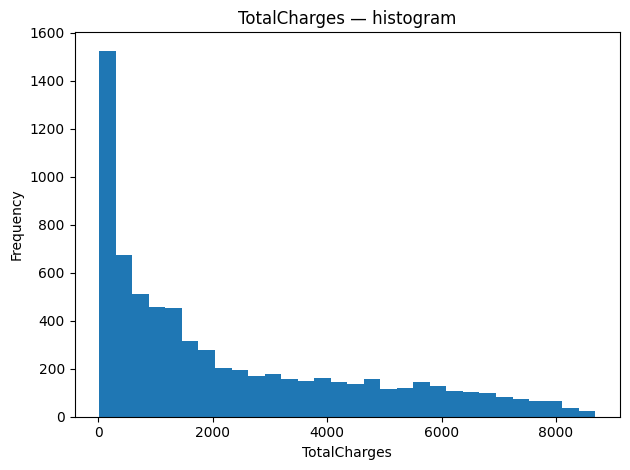

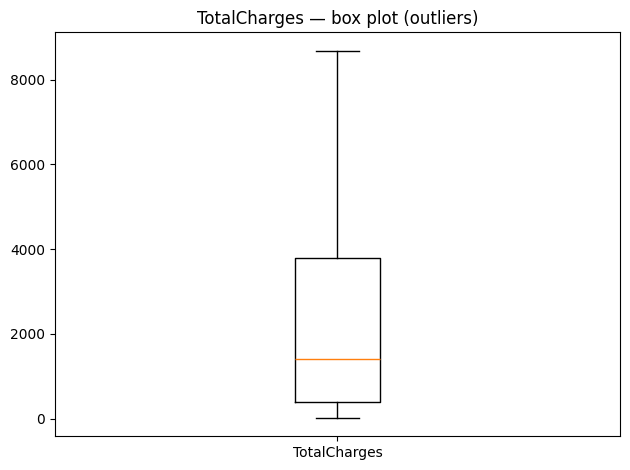

In [7]:
# Identify numeric columns
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != 'SeniorCitizen']
# Keep SeniorCitizen as numeric but treat it like categorical (0/1) for EDA below

print('Numeric columns for profiling:', numeric_cols)

for col in numeric_cols:
    s = df[col].dropna()
    if s.empty:
        continue
    stats = {
        'count': int(s.shape[0]),
        'mean': float(s.mean()),
        'median': float(s.median()),
        'std': float(s.std()),
        'min': float(s.min()),
        'max': float(s.max()),
        'skewness': float(s.skew()),
        'kurtosis': float(s.kurtosis()),
    }
    print(f"\n--- {col} stats ---")
    for k, v in stats.items():
        print(f"{k}: {v}")

    # Histogram
    plt.figure()
    plt.hist(s, bins=30)
    plt.title(f'{col} — histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Box plot
    plt.figure()
    plt.boxplot(s, labels=[col])
    plt.title(f'{col} — box plot (outliers)')
    plt.tight_layout()
    plt.show()


## 7) Categorical Feature Profiling
For **each categorical feature** we show:
- value counts
- percentage breakdown
- bar chart


Categorical columns for profiling: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']

--- gender ---


,count,percent
gender,,
Male,3555,50.48
Female,3488,49.52


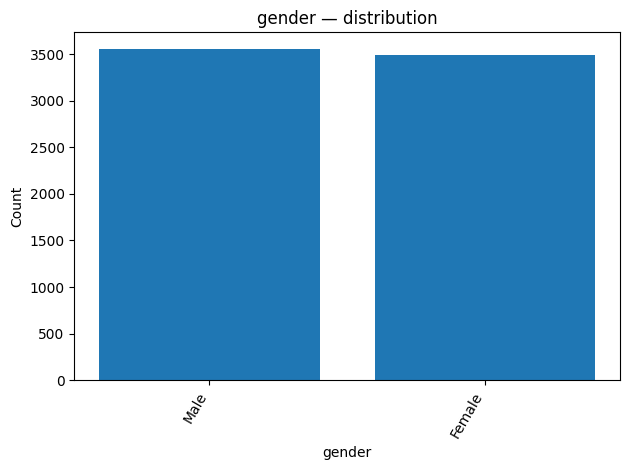


--- Partner ---


,count,percent
Partner,,
No,3641,51.7
Yes,3402,48.3


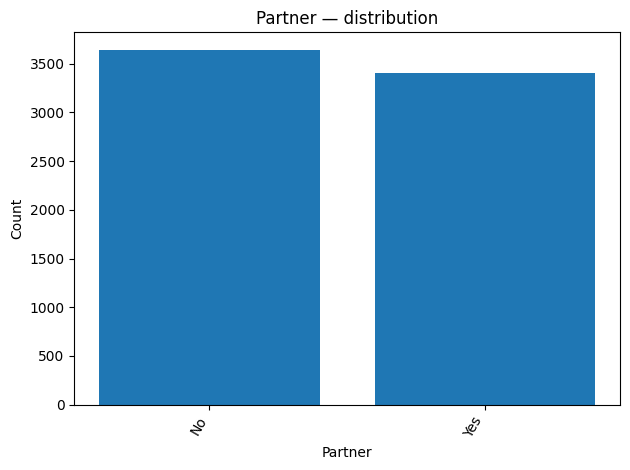


--- Dependents ---


,count,percent
Dependents,,
No,4933,70.04
Yes,2110,29.96


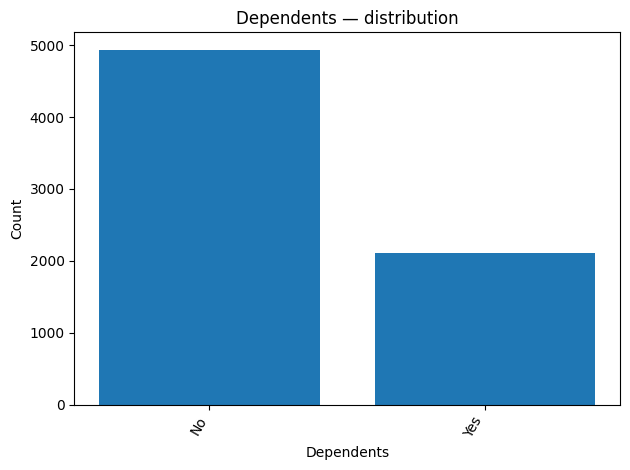


--- PhoneService ---


,count,percent
PhoneService,,
Yes,6361,90.32
No,682,9.68


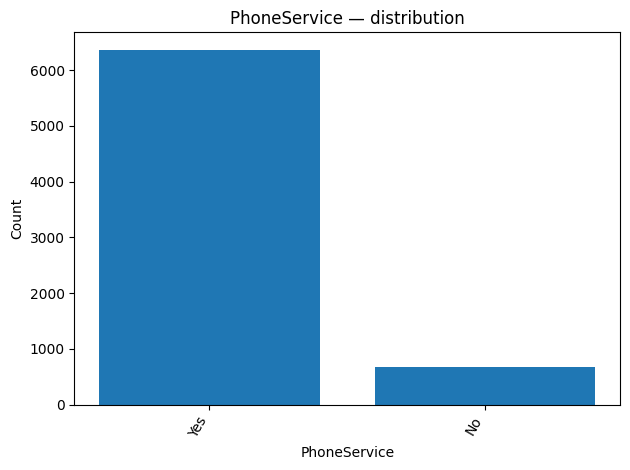


--- MultipleLines ---


,count,percent
MultipleLines,,
No,3390,48.13
Yes,2971,42.18
No phone service,682,9.68


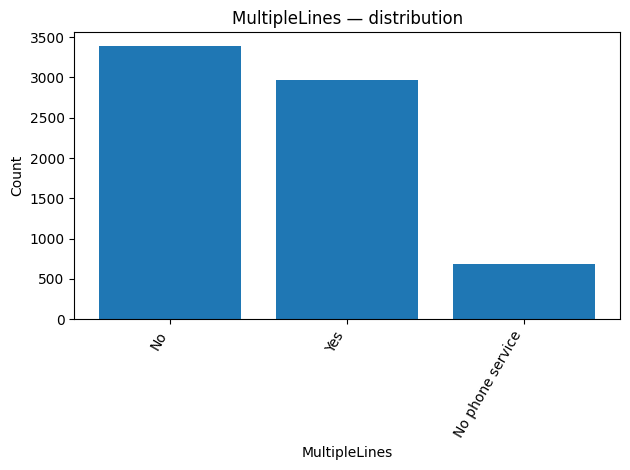


--- InternetService ---


,count,percent
InternetService,,
Fiber optic,3096,43.96
DSL,2421,34.37
No,1526,21.67


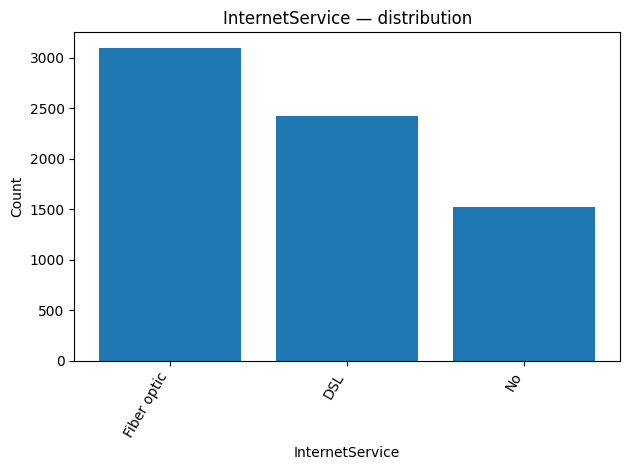


--- OnlineSecurity ---


,count,percent
OnlineSecurity,,
No,3498,49.67
Yes,2019,28.67
No internet service,1526,21.67


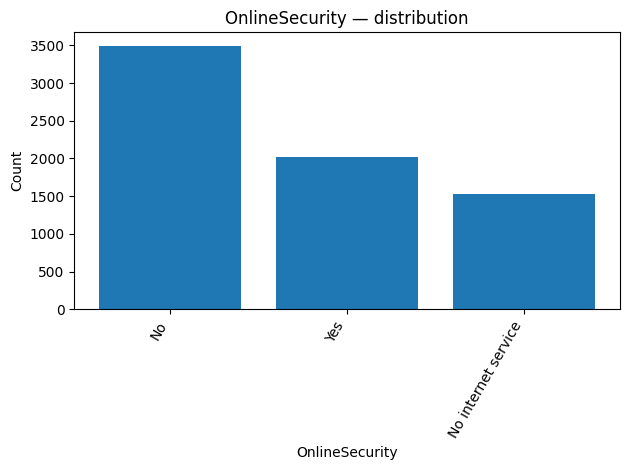


--- OnlineBackup ---


,count,percent
OnlineBackup,,
No,3088,43.84
Yes,2429,34.49
No internet service,1526,21.67


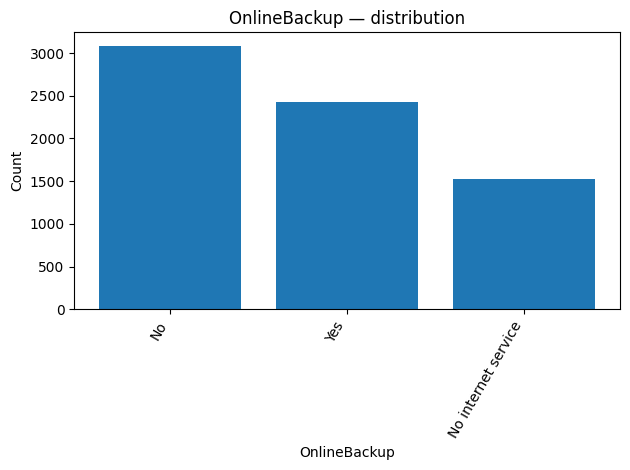


--- DeviceProtection ---


,count,percent
DeviceProtection,,
No,3095,43.94
Yes,2422,34.39
No internet service,1526,21.67


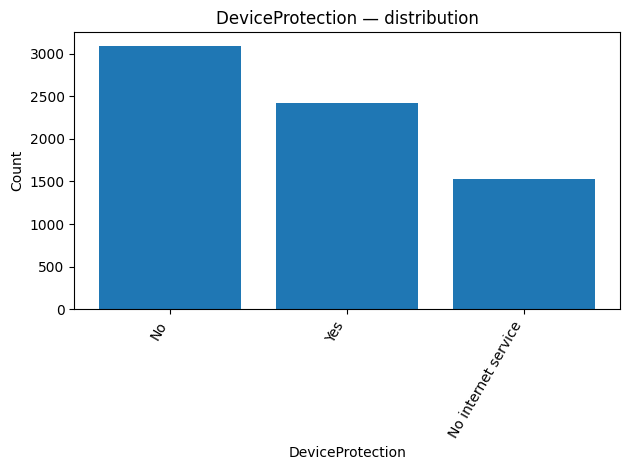


--- TechSupport ---


,count,percent
TechSupport,,
No,3473,49.31
Yes,2044,29.02
No internet service,1526,21.67


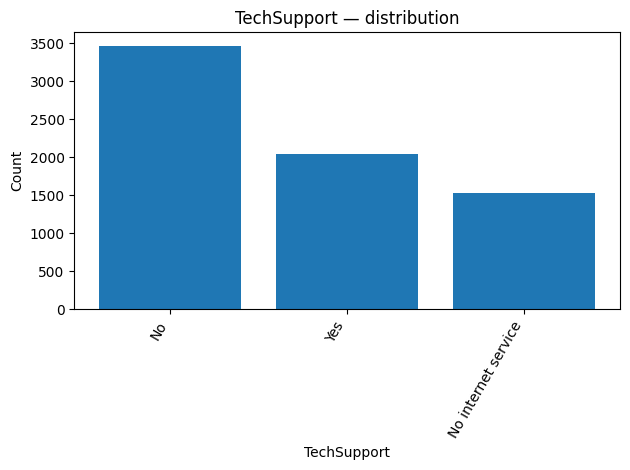


--- StreamingTV ---


,count,percent
StreamingTV,,
No,2810,39.90
Yes,2707,38.44
No internet service,1526,21.67


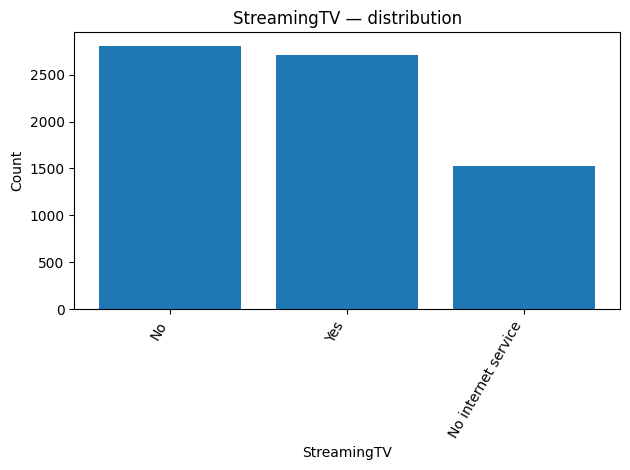


--- StreamingMovies ---


,count,percent
StreamingMovies,,
No,2785,39.54
Yes,2732,38.79
No internet service,1526,21.67


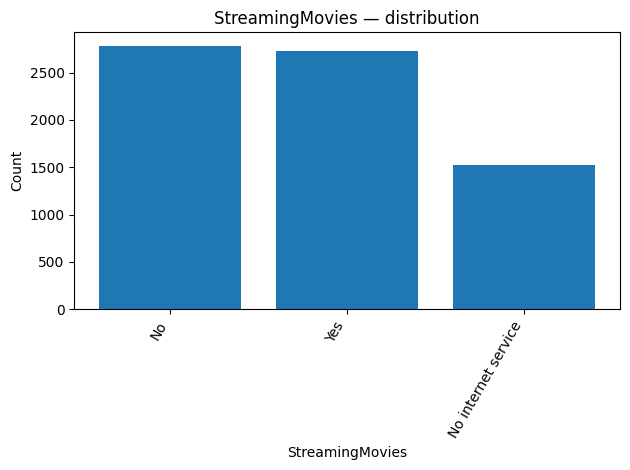


--- Contract ---


,count,percent
Contract,,
Month-to-month,3875,55.02
Two year,1695,24.07
One year,1473,20.91


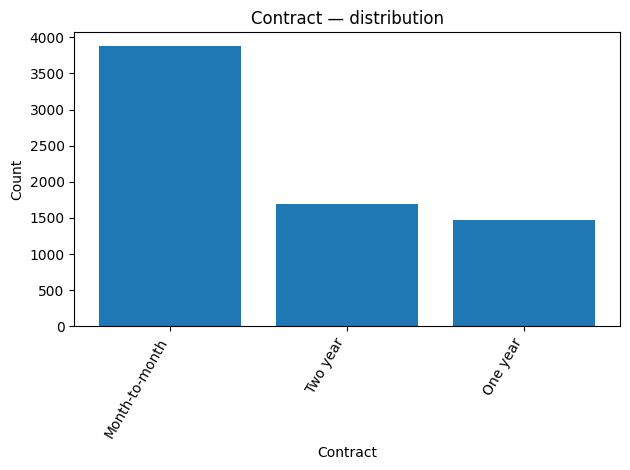


--- PaperlessBilling ---


,count,percent
PaperlessBilling,,
Yes,4171,59.22
No,2872,40.78


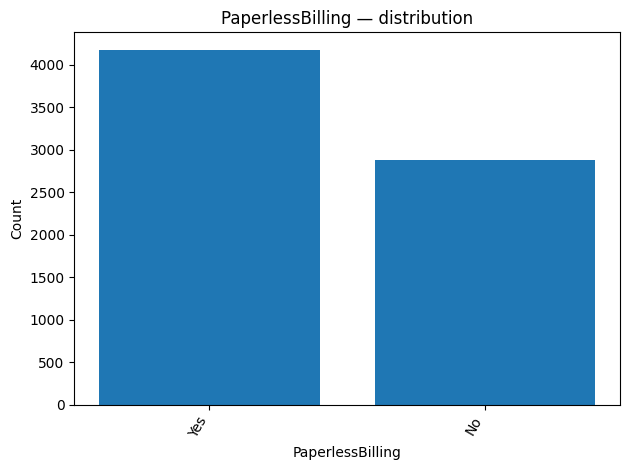


--- PaymentMethod ---


,count,percent
PaymentMethod,,
Electronic check,2365,33.58
Mailed check,1612,22.89
Bank transfer (automatic),1544,21.92
Credit card (automatic),1522,21.61


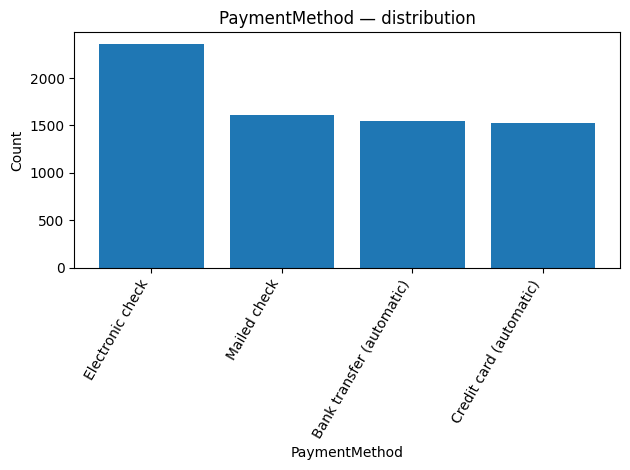


--- Churn ---


,count,percent
Churn,,
No,5174,73.46
Yes,1869,26.54


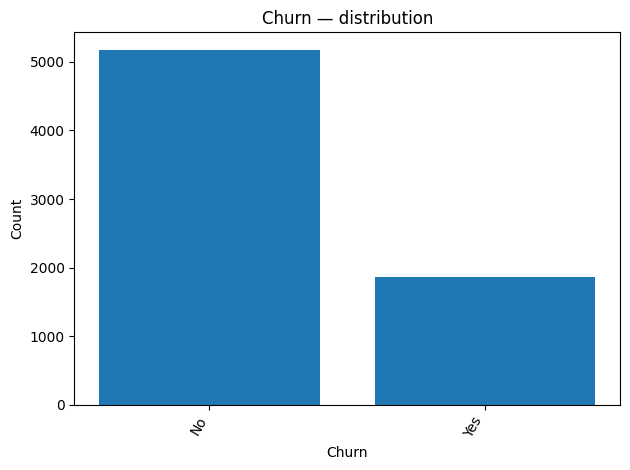


--- SeniorCitizen ---


,count,percent
SeniorCitizen,,
0,5901,83.79
1,1142,16.21


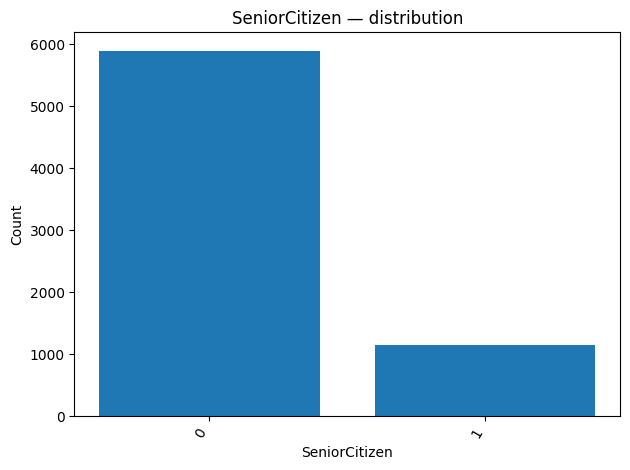

In [8]:
# Identify categorical columns
categorical_cols = [c for c in df.columns if df[c].dtype == 'object' and c != 'customerID']
# Treat SeniorCitizen as categorical for this section
if 'SeniorCitizen' in df.columns:
    categorical_cols = categorical_cols + ['SeniorCitizen']

print('Categorical columns for profiling:', categorical_cols)

for col in categorical_cols:
    vc = df[col].value_counts(dropna=False)
    pct = df[col].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'count': vc, 'percent': pct.round(2)})
    print(f"\n--- {col} ---")
    display(summary)

    # Bar chart
    plt.figure()
    plt.bar(summary.index.astype(str), summary['count'].values)
    plt.title(f'{col} — distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()


## 8) Bivariate & Multivariate Analysis
We include:
- Correlation matrix (numeric features) + heatmap
- Crosstabs of key categorical features vs churn


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


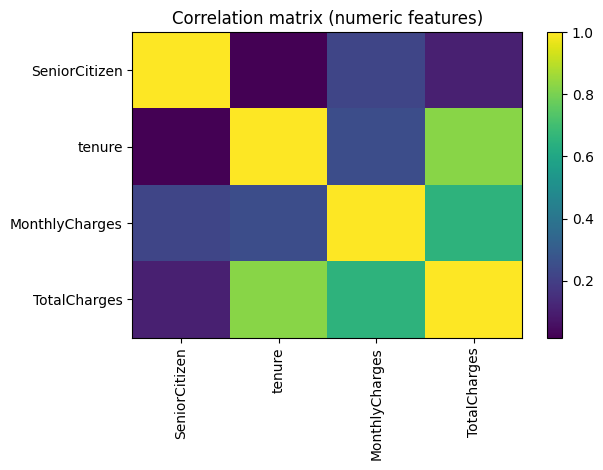


Churn % by Contract:


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83



Churn % by InternetService:


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40



Churn % by PaymentMethod:


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


In [9]:
# Correlation matrix (numeric only)
numeric_for_corr = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
corr = df[numeric_for_corr].corr(numeric_only=True)
display(corr)

plt.figure()
plt.imshow(corr.values, aspect='auto')
plt.title('Correlation matrix (numeric features)')
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.colorbar()
plt.tight_layout()
plt.show()

# Crosstab examples vs target
def churn_crosstab(feature: str):
    tab = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    return tab.round(2)

for feature in ['Contract', 'InternetService', 'PaymentMethod']:
    if feature in df.columns:
        print(f"\nChurn % by {feature}:")
        display(churn_crosstab(feature))


## 9) Modeling (Classification Track)
We train:
- Baseline: Logistic Regression
- Advanced: Random Forest

**Class imbalance strategy:** we compare Logistic Regression **without** vs **with** `class_weight='balanced'` and report metric impact.

In [10]:
# Prepare X/y
y = (df['Churn'] == 'Yes').astype(int)
X = df.drop(columns=['Churn'], errors='ignore')
if 'customerID' in X.columns:
    X = X.drop(columns=['customerID'])

numeric_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)


In [11]:
def evaluate_model(name, model, X_test, y_test):
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    return {
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'cm': cm,
        'pred': pred,
    }

def show_confusion(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot()
    plt.title(title)
    plt.tight_layout()
    plt.show()


### 9.1 Baseline: Logistic Regression (No Imbalance Handling)

LogReg (no class_weight)
Accuracy : 0.8055358410220014
Precision: 0.6572327044025157
Recall   : 0.5588235294117647
F1       : 0.6040462427745664

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



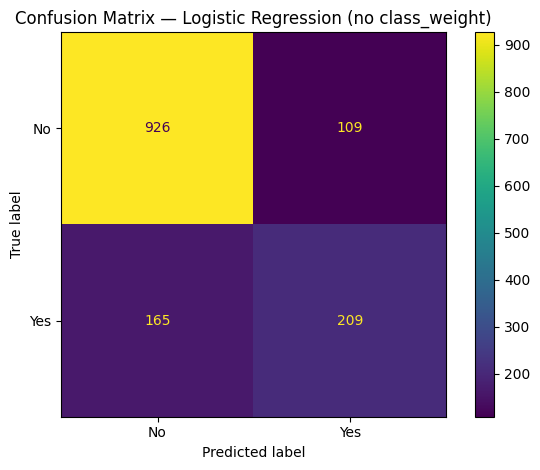

In [12]:
lr_plain = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))
])
lr_plain.fit(X_train, y_train)
res_lr_plain = evaluate_model('LogReg (no class_weight)', lr_plain, X_test, y_test)
print(res_lr_plain['model'])
print('Accuracy :', res_lr_plain['accuracy'])
print('Precision:', res_lr_plain['precision'])
print('Recall   :', res_lr_plain['recall'])
print('F1       :', res_lr_plain['f1'])
print('\nClassification report:\n', classification_report(y_test, res_lr_plain['pred']))
show_confusion(res_lr_plain['cm'], 'Confusion Matrix — Logistic Regression (no class_weight)')


### 9.2 Baseline (With Class Imbalance Handling): Logistic Regression + `class_weight='balanced'`

LogReg (class_weight='balanced')
Accuracy : 0.7381121362668559
Precision: 0.504302925989673
Recall   : 0.7834224598930482
F1       : 0.6136125654450262

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



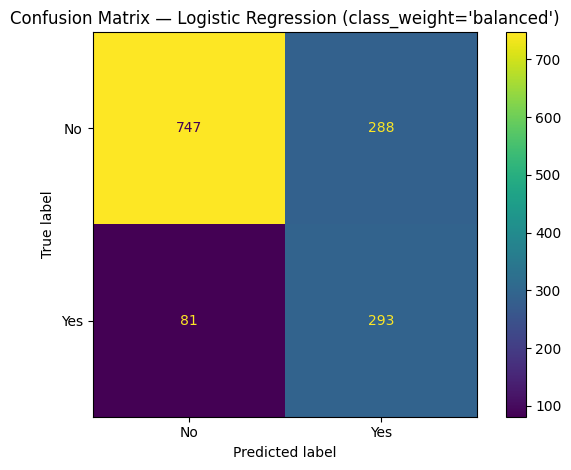

In [13]:
lr_bal = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=RANDOM_STATE))
])
lr_bal.fit(X_train, y_train)
res_lr_bal = evaluate_model("LogReg (class_weight='balanced')", lr_bal, X_test, y_test)
print(res_lr_bal['model'])
print('Accuracy :', res_lr_bal['accuracy'])
print('Precision:', res_lr_bal['precision'])
print('Recall   :', res_lr_bal['recall'])
print('F1       :', res_lr_bal['f1'])
print('\nClassification report:\n', classification_report(y_test, res_lr_bal['pred']))
show_confusion(res_lr_bal['cm'], "Confusion Matrix — Logistic Regression (class_weight='balanced')")


# 9.3 Threshold tuning (decision boundary) for Logistic Regression

In [15]:
proba_lr = lr_bal.predict_proba(X_test)[:, 1]

thresholds = [0.30, 0.40, 0.50, 0.60, 0.70]

rows = []
cms = {}

for t in thresholds:
    pred_t = (proba_lr >= t).astype(int)
    cm = confusion_matrix(y_test, pred_t)  # [[TN, FP],[FN, TP]]
    tn, fp, fn, tp = cm.ravel()

    rows.append({
        "threshold": t,
        "accuracy": accuracy_score(y_test, pred_t),
        "precision": precision_score(y_test, pred_t, zero_division=0),
        "recall": recall_score(y_test, pred_t, zero_division=0),
        "f1": f1_score(y_test, pred_t, zero_division=0),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

    cms[t] = cm

results = pd.DataFrame(rows).sort_values("threshold")
display(results)

,threshold,accuracy,precision,recall,f1,TN,FP,FN,TP
0,0.3,0.652945,0.428925,0.927807,0.586644,573,462,27,347
1,0.4,0.701207,0.466187,0.866310,0.606174,664,371,50,324
2,0.5,0.738112,0.504303,0.783422,0.613613,747,288,81,293
3,0.6,0.762243,0.539877,0.705882,0.611819,810,225,110,264
4,0.7,0.789212,0.603217,0.601604,0.602410,887,148,149,225


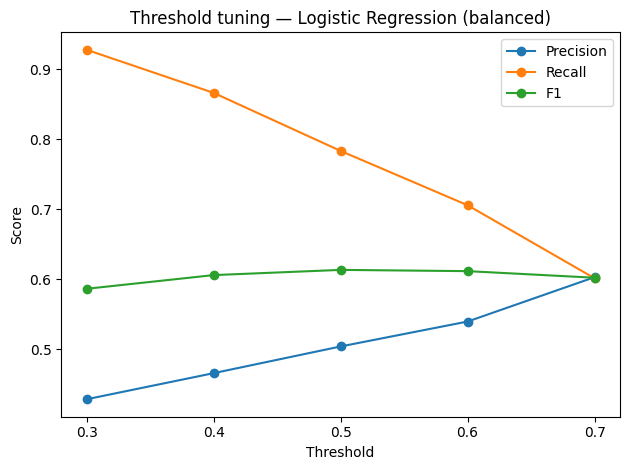

In [16]:
# Plot Precision/Recall/F1 vs Threshold (decision boundary effect)
plt.figure()
plt.plot(results["threshold"], results["precision"], marker="o", label="Precision")
plt.plot(results["threshold"], results["recall"], marker="o", label="Recall")
plt.plot(results["threshold"], results["f1"], marker="o", label="F1")
plt.title("Threshold tuning — Logistic Regression (balanced)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.xticks(results["threshold"])
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# Show confusion matrix for a chosen threshold
# Change this to any threshold in the list above
chosen_threshold = 0.60

cm = cms[chosen_threshold]
tn, fp, fn, tp = cm.ravel()

print(f"Chosen threshold = {chosen_threshold}")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print("Interpretation:")
print("- FP (false positives): predicted churn but they stayed -> retention cost wasted")
print("- FN (false negatives): predicted stay but they churned -> lost customer")


Chosen threshold = 0.6
TN=810, FP=225, FN=110, TP=264
Interpretation:
- FP (false positives): predicted churn but they stayed -> retention cost wasted
- FN (false negatives): predicted stay but they churned -> lost customer


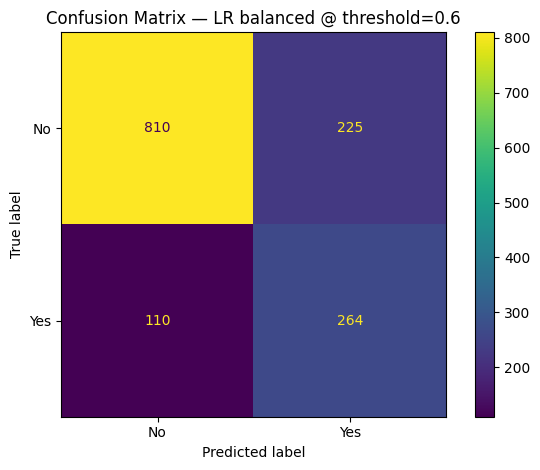


Best threshold by F1:


,threshold,accuracy,precision,recall,f1,TN,FP,FN,TP
2,0.5,0.738112,0.504303,0.783422,0.613613,747.0,288.0,81.0,293.0


In [18]:
# Visualize that confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot()
plt.title(f"Confusion Matrix — LR balanced @ threshold={chosen_threshold}")
plt.tight_layout()
plt.show()

# Pick the threshold that maximizes F1
best_row = results.iloc[results["f1"].values.argmax()]
print("\nBest threshold by F1:")
display(best_row.to_frame().T)

# 9.4 Cost-based Threshold Selection (Business Justification)
Uses probability of churn to choose a threshold that minimizes expected cost.


**Set business costs** (EDIT THESE)

 - FN cost: We predicted "stay" but the customer churned -> lost revenue / lost margin / CAC, etc.
    - **FN_COST = 30000**  # ₦X  (example: ₦30,000 lost contribution)
 - FP cost: We predicted "churn" but they stayed -> retention spend wasted (discount/call center time)
    - **FP_COST = 5000**   # ₦Y  (example: ₦5,000 retention incentive cost)

 - Optional: We include TP cost if we want (e.g., cost of offering incentive to a true churner)

 - If we run a retention program, we may still pay incentives for TP cases.

 - If we don't want it, we keep TP_COST = 0.
    - **TP_COST = 0**

- TN cost is usually 0
    - **TN_COST = 0**

In [19]:
FN_COST = 30000
FP_COST = 5000
TP_COST = 0
TN_COST = 0

# Search thresholds and compute total cost

thresholds = np.round(np.arange(0.05, 0.96, 0.01), 2)

rows = []
for t in thresholds:
    pred_t = (proba_lr >= t).astype(int)
    cm = confusion_matrix(y_test, pred_t)  # [[TN, FP],[FN, TP]]
    tn, fp, fn, tp = cm.ravel()

    total_cost = (tn * TN_COST) + (fp * FP_COST) + (fn * FN_COST) + (tp * TP_COST)
    rows.append({
        "threshold": float(t),
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp),
        "total_cost": float(total_cost),
        "avg_cost_per_customer": float(total_cost / len(y_test))
    })

cost_df = pd.DataFrame(rows).sort_values("total_cost", ascending=True)

# Best threshold = lowest total cost
best = cost_df.iloc[0]
best_t = best["threshold"]

print("=== Cost-based threshold selection ===")
print(f"FN_COST = ₦{FN_COST:,} | FP_COST = ₦{FP_COST:,} | TP_COST = ₦{TP_COST:,} | TN_COST = ₦{TN_COST:,}")
print(f"Best threshold (min total cost): {best_t}")
display(best.to_frame().T)

# Show top 10 thresholds by lowest cost
print("\nTop 10 thresholds by lowest total cost:")
display(cost_df.head(10))

=== Cost-based threshold selection ===
FN_COST = ₦30,000 | FP_COST = ₦5,000 | TP_COST = ₦0 | TN_COST = ₦0
Best threshold (min total cost): 0.29


,threshold,TN,FP,FN,TP,total_cost,avg_cost_per_customer
24,0.29,566.0,469.0,25.0,349.0,3095000.0,2196.593329



Top 10 thresholds by lowest total cost:


,threshold,TN,FP,FN,TP,total_cost,avg_cost_per_customer
24,0.29,566,469,25,349,3095000.0,2196.593329
26,0.31,583,452,28,346,3100000.0,2200.141945
25,0.30,573,462,27,347,3120000.0,2214.336409
27,0.32,591,444,30,344,3120000.0,2214.336409
28,0.33,599,436,32,342,3140000.0,2228.530873
30,0.35,617,418,35,339,3140000.0,2228.530873
29,0.34,608,427,34,340,3155000.0,2239.176721
23,0.28,553,482,25,349,3160000.0,2242.725337
22,0.27,543,492,24,350,3180000.0,2256.919801
16,0.21,480,555,14,360,3195000.0,2267.565649


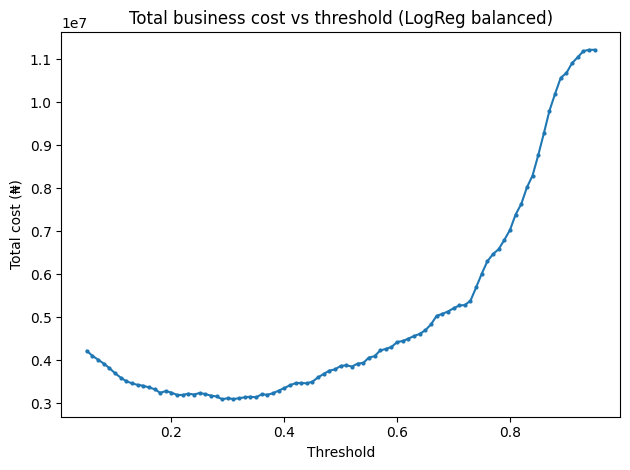

In [20]:
# Plot cost vs threshold

plt.figure()
plt.plot(cost_df.sort_values("threshold")["threshold"],
         cost_df.sort_values("threshold")["total_cost"],
         marker="o", markersize=2)
plt.title("Total business cost vs threshold (LogReg balanced)")
plt.xlabel("Threshold")
plt.ylabel("Total cost (₦)")
plt.tight_layout()
plt.show()

In [21]:
# Explain the decision in words (business justification)

tn, fp, fn, tp = int(best["TN"]), int(best["FP"]), int(best["FN"]), int(best["TP"])
print("\nBusiness interpretation at best threshold:")
print(f"- False Positives (FP): {fp} customers flagged as at-risk but would stay anyway.")
print(f"  Cost impact: FP * FP_COST = {fp} * ₦{FP_COST:,} = ₦{fp*FP_COST:,}")
print(f"- False Negatives (FN): {fn} customers predicted to stay but actually churn.")
print(f"  Cost impact: FN * FN_COST = {fn} * ₦{FN_COST:,} = ₦{fn*FN_COST:,}")
print(f"- Total cost at threshold {best_t}: ₦{int(best['total_cost']):,}")
print(f"- Average cost per customer (test set): ₦{best['avg_cost_per_customer']:.2f}")



Business interpretation at best threshold:
- False Positives (FP): 469 customers flagged as at-risk but would stay anyway.
  Cost impact: FP * FP_COST = 469 * ₦5,000 = ₦2,345,000
- False Negatives (FN): 25 customers predicted to stay but actually churn.
  Cost impact: FN * FN_COST = 25 * ₦30,000 = ₦750,000
- Total cost at threshold 0.29: ₦3,095,000
- Average cost per customer (test set): ₦2196.59


In [22]:
# Compare against default threshold 0.50

def cost_at_threshold(t):
    pred_t = (proba_lr >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_t).ravel()
    total_cost = (tn*TN_COST) + (fp*FP_COST) + (fn*FN_COST) + (tp*TP_COST)
    return int(total_cost), int(fp), int(fn)

default_cost, default_fp, default_fn = cost_at_threshold(0.50)
best_cost, best_fp, best_fn = int(best["total_cost"]), fp, fn

print("\nComparison vs default threshold=0.50:")
print(f"- Default (0.50): total cost = ₦{default_cost:,} | FP={default_fp} | FN={default_fn}")
print(f"- Best   ({best_t}): total cost = ₦{best_cost:,} | FP={best_fp} | FN={best_fn}")
print(f"- Savings by using best threshold: ₦{default_cost - best_cost:,}")


Comparison vs default threshold=0.50:
- Default (0.50): total cost = ₦3,870,000 | FP=288 | FN=81
- Best   (0.29): total cost = ₦3,095,000 | FP=469 | FN=25
- Savings by using best threshold: ₦775,000


### 9.5 Compare imbalance strategy impact
This table shows how `class_weight='balanced'` changes precision/recall tradeoffs.

In [23]:
comparison = pd.DataFrame([
    {k: res_lr_plain[k] for k in ['model','accuracy','precision','recall','f1']},
    {k: res_lr_bal[k] for k in ['model','accuracy','precision','recall','f1']},
])
display(comparison)


,model,accuracy,precision,recall,f1
0,LogReg (no class_weight),0.805536,0.657233,0.558824,0.604046
1,LogReg (class_weight='balanced'),0.738112,0.504303,0.783422,0.613613


### 9.6 Advanced model: Random Forest (with imbalance handling)
Random Forest often captures non-linearities and interactions better than Logistic Regression.

RandomForest (balanced_subsample)
Accuracy : 0.7828246983676366
Precision: 0.6188811188811189
Recall   : 0.4732620320855615
F1       : 0.5363636363636364

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



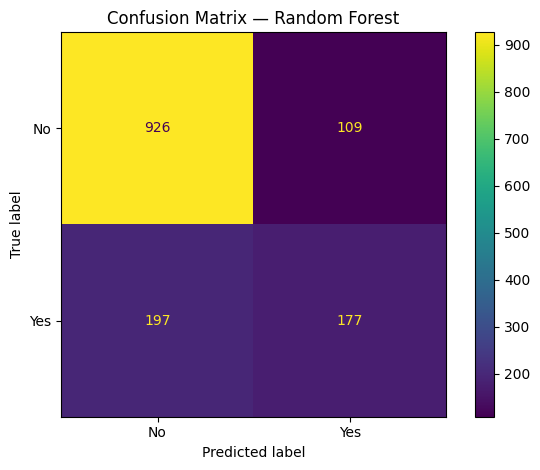

In [24]:
rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=400,
        random_state=RANDOM_STATE,
        class_weight='balanced_subsample',
        n_jobs=-1
    ))
])
rf.fit(X_train, y_train)
res_rf = evaluate_model('RandomForest (balanced_subsample)', rf, X_test, y_test)
print(res_rf['model'])
print('Accuracy :', res_rf['accuracy'])
print('Precision:', res_rf['precision'])
print('Recall   :', res_rf['recall'])
print('F1       :', res_rf['f1'])
print('\nClassification report:\n', classification_report(y_test, res_rf['pred']))
show_confusion(res_rf['cm'], 'Confusion Matrix — Random Forest')


## 10) Error Analysis
We quantify **false positives** and **false negatives** and interpret what they mean for the business.
- False Positive (predict churn but customer stays): may cause **unnecessary retention cost**.
- False Negative (predict stay but customer churns): causes **lost revenue**.


In [25]:
def error_breakdown(cm):
    tn, fp, fn, tp = cm.ravel()
    return {'TN': int(tn), 'FP': int(fp), 'FN': int(fn), 'TP': int(tp)}

err_lr_plain = error_breakdown(res_lr_plain['cm'])
err_lr_bal = error_breakdown(res_lr_bal['cm'])
err_rf = error_breakdown(res_rf['cm'])

display(pd.DataFrame([
    {'model': res_lr_plain['model'], **err_lr_plain},
    {'model': res_lr_bal['model'], **err_lr_bal},
    {'model': res_rf['model'], **err_rf},
]))

print('\nInterpretation guide:')
print('- FP = predicted churn but actually stayed (retention spend wasted)')
print('- FN = predicted stay but actually churned (missed intervention, lost customer)')


,model,TN,FP,FN,TP
0,LogReg (no class_weight),926,109,165,209
1,LogReg (class_weight='balanced'),747,288,81,293
2,RandomForest (balanced_subsample),926,109,197,177



Interpretation guide:
- FP = predicted churn but actually stayed (retention spend wasted)
- FN = predicted stay but actually churned (missed intervention, lost customer)


## 11) Feature Importance / Coefficient Interpretation
- Logistic Regression: coefficients (direction/strength)
- Random Forest: feature importances


In [27]:
# Logistic Regression coefficients (using the balanced LR model)
try:
    ohe = lr_bal.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
    feature_names = numeric_cols + cat_feature_names

    coefs = lr_bal.named_steps['model'].coef_[0]
    coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}).sort_values('coef', ascending=False)

    print('Top 15 features increasing churn probability (positive coef):')
    display(coef_df.head(15))

    print('Top 15 features decreasing churn probability (negative coef):')
    display(coef_df.tail(15))
except Exception as e:
    print('Could not compute Logistic Regression coefficient table:', e)



Top 15 features increasing churn probability (positive coef):


,feature,coef
16,InternetService_Fiber optic,0.705336
36,Contract_Month-to-month,0.663399
3,TotalCharges,0.457211
35,StreamingMovies_Yes,0.274978
32,StreamingTV_Yes,0.262038
43,PaymentMethod_Electronic check,0.238805
18,OnlineSecurity_No,0.197856
27,TechSupport_No,0.163785
14,MultipleLines_Yes,0.132556
26,DeviceProtection_Yes,0.074017


Top 15 features decreasing churn probability (negative coef):


,feature,coef
33,StreamingMovies_No,-0.190651
9,Dependents_Yes,-0.209103
12,MultipleLines_No,-0.213415
39,PaperlessBilling_No,-0.263365
28,TechSupport_No internet service,-0.274568
19,OnlineSecurity_No internet service,-0.274568
17,InternetService_No,-0.274568
34,StreamingMovies_No internet service,-0.274568
31,StreamingTV_No internet service,-0.274568
22,OnlineBackup_No internet service,-0.274568


,feature,importance
3,TotalCharges,0.141175
1,tenure,0.130875
2,MonthlyCharges,0.121623
36,Contract_Month-to-month,0.073916
18,OnlineSecurity_No,0.037462
38,Contract_Two year,0.035787
27,TechSupport_No,0.033459
43,PaymentMethod_Electronic check,0.027614
16,InternetService_Fiber optic,0.026811
21,OnlineBackup_No,0.017063


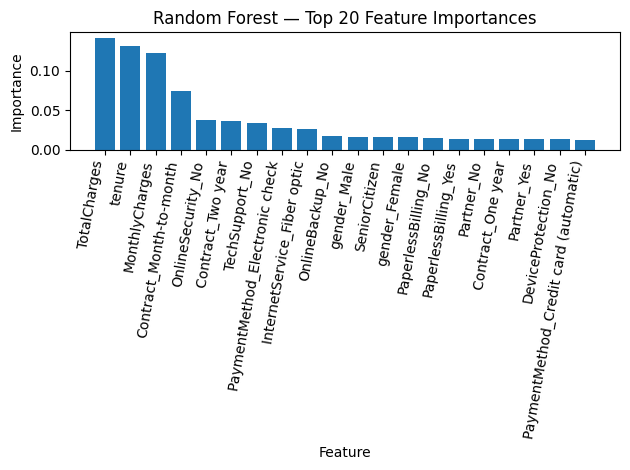

In [28]:
# Random Forest feature importances
try:
    rf_model = rf.named_steps['model']
    ohe_rf = rf.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot']
    cat_feature_names_rf = ohe_rf.get_feature_names_out(categorical_cols).tolist()
    feature_names_rf = numeric_cols + cat_feature_names_rf

    importances = rf_model.feature_importances_
    imp_df = pd.DataFrame({'feature': feature_names_rf, 'importance': importances}).sort_values('importance', ascending=False)
    display(imp_df.head(20))

    plt.figure()
    plt.bar(imp_df.head(20)['feature'].astype(str), imp_df.head(20)['importance'].values)
    plt.title('Random Forest — Top 20 Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=80, ha='right')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Could not compute Random Forest importances:', e)

## 12) Business Metric
**Churn Rate** (baseline KPI) = % of customers who churned in the dataset.


In [29]:
churn_rate = (df['Churn'] == 'Yes').mean()
print(f'Estimated churn rate (from this dataset): {churn_rate:.4f} ({churn_rate*100:.2f}%)')


Estimated churn rate (from this dataset): 0.2654 (26.54%)


## 13) Final Summary & Recommendations

### Project Overview
This project involved building an end-to-end classification pipeline to predict customer churn for a telecommunications provider. We performed rigorous data cleaning, exploratory data analysis (EDA), and compared multiple modeling strategies with a focus on addressing class imbalance and business-driven decision making.

### Key Findings from EDA
- **Churn Profile:** The baseline churn rate is approximately **26.5%**.
- **Key Drivers:** Customers with **Month-to-month contracts**, **Fiber optic internet**, and those using **Electronic checks** showed significantly higher churn rates.
- **Tenure:** Long-term customers are much less likely to churn, indicating that the first few months of a subscription are critical for retention.
- **Charges:** Higher monthly charges are positively correlated with churn, suggesting price sensitivity among the customer base.

### Model Performance & Comparison
- **Baseline Logistic Regression:** Achieved high accuracy (~80%) but struggled with recall for the churn class (~56%), missing many customers who actually left.
- **Balanced Logistic Regression:** By adjusting class weights, we improved **Recall to ~78%**, ensuring we identify more at-risk customers, albeit at the cost of more false positives.
- **Random Forest:** Provided strong feature importance insights but, in this specific configuration, offered a different precision/recall tradeoff compared to the linear model.

### Business Justification & Recommendations
1.  **Optimal Threshold Selection:** Using a cost-based approach (setting high costs for False Negatives), we determined that a lower decision threshold (e.g., **0.29**) is optimal. This strategy minimizes the total financial impact by prioritizing the capture of churning customers even if it leads to more retention offers for non-churners.
2.  **Targeted Retention Programs:** The business should focus retention efforts on customers with the identified high-risk features:
    - Offer incentives to transition from **Month-to-month** to **One or Two-year contracts**.
    - Review the service quality and pricing for **Fiber optic** users to reduce dissatisfaction.
3.  **Proactive Monitoring:** Implement the Balanced Logistic Regression model as a proactive monitoring tool to flag at-risk customers early in their tenure.
4.  **Financial Impact:** Transitioning from a default threshold (0.50) to the cost-optimized threshold is estimated to save approximately **‖775,000** in the test set by reducing the number of lost customers (False Negatives).